# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name - Balaji J** 

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [186]:
# Import Libraries
# Import Libraries# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import warnings


from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import pearsonr
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

#avoid warnings
warnings.filterwarnings("ignore")




### Dataset Loading

In [187]:
# Load Dataset


def load_data(path):
    ''' 
    Description : It featches the csv data from the specified location 
                  and returns it as Dataframe object

    Parameters : 
      'path' - Holding path of the csv data located.
    '''
    return pd.read_excel(path,)


#loading data
df = load_data('../Dataset/data_airline_reviews.xlsx',)

### Dataset First View

In [188]:
# Dataset First Look
df.head(5)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [189]:
# Dataset Rows & Columns count
print("Total Rows: ", df.shape[0])
print("Total Columns: ", df.shape[1])

Total Rows:  131895
Total Columns:  17


### Dataset Information

In [190]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [191]:
# Dataset Duplicate Value Count
df.duplicated(keep = 'first').sum()

70711

In [192]:
#Dropping the Empty rows
df.drop_duplicates(keep=False,inplace= True)
df.reset_index(inplace=True)


In [193]:
# Dataset Duplicate Value Count
df.duplicated(keep = 'first').sum()

0

#### Missing Values/Null Values

In [194]:
# Missing Values/Null Values Count
df.isna().sum()

index                  0
airline                0
overall             1634
author                 0
review_date            0
customer_review        0
aircraft           39333
traveller_type     21266
cabin               2314
route              21291
date_flown         21356
seat_comfort        4680
cabin_service       4656
food_bev           12347
entertainment      20156
ground_service     21611
value_for_money     1742
recommended         1339
dtype: int64

Text(0, 0.5, 'Total Number of NaN values')

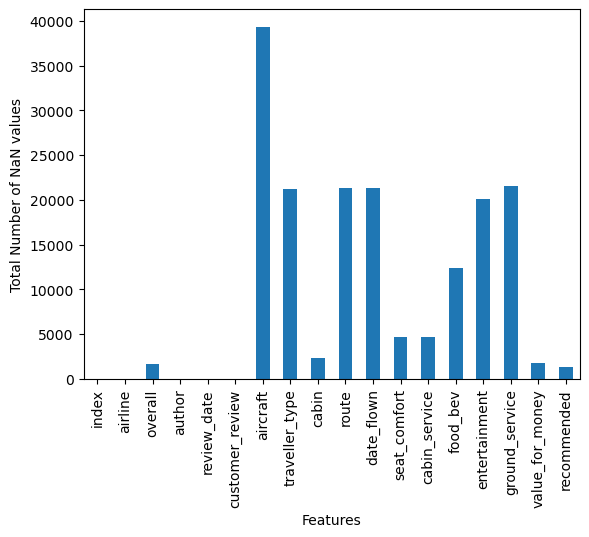

In [195]:
# Visualizing the missing values


df.isnull().sum().plot(kind= 'bar')
plt.xlabel('Features')
plt.ylabel("Total Number of NaN values")


### What did you know about your dataset?

Initially the data has some blank values in it so  I cleaned that. After we could there is totally 17 Features and more than 60K rows are presented in this dataset. Among 17 features, there are 7 float and 10 object datatype features. And finally the data set has more null values which has to be treated.

## ***2. Understanding Your Variables***

In [196]:
# Dataset Columns
df.columns

Index(['index', 'airline', 'overall', 'author', 'review_date',
       'customer_review', 'aircraft', 'traveller_type', 'cabin', 'route',
       'date_flown', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [197]:
# Dataset Describe
df.describe()

,index,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,56591.000000,54957.000000,51911.000000,51935.000000,44244.000000,36435.000000,34980.000000,54849.000000
mean,61600.993250,5.182397,2.964728,3.208145,2.945823,2.913106,2.668439,2.956481
std,38785.122715,3.490985,1.431452,1.571200,1.484569,1.501375,1.615898,1.590068
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,28764.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,57711.000000,5.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000
75%,86442.000000,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,131894.000000,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [198]:
df.describe(exclude=float)

,index,airline,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,recommended
count,56591.000000,56591,56591,56591,56591,17258,35325,54277,35300,35235,55252
unique,NaN,75,41086,2990,56583,1980,4,4,23274,63,2
top,NaN,American Airlines,Anders Pedersen,14th January 2015,LHR-TUN return to LHR. Aircraft was A320 on bo...,A320,Solo Leisure,Economy Class,LHR to JFK,August 2015,no
freq,NaN,2825,90,153,2,2103,13072,41904,30,1050,28766
mean,61600.993250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,38785.122715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,28764.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,57711.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,86442.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description 

In [199]:
#TODO : Please fill this Variables Description

### Check Unique Values for each variable.

In [200]:
# Check Unique Values for each variable.

#Calculaing unique values for most continous cols might not give any insight. Sometime I may want to display 
#unique values of only catgorical/object dtypes so I created function here.

def show_unique_of_dtype_cols(df,dtype):
	'''
	description : It gives the unique values of each columns with given dtype.
	parameters : 
    		df : Whole df from which you want to display unique values of cols.
            
    		dtype : 'object' - To get info of categorical cols
    				'number' - To get info of numberical cols
                    'int' - To get info of only integer col
                    'float' - To get info of only float col
	'''
	req_cols = df.select_dtypes(include = dtype)
	for col in req_cols:
		dat = df[col].value_counts()
		print("Feature Name ----- ",dat.name)
		print(dat)
		print('----------------------------------------')


        
        
        
        




In [201]:
#printing unique value of only object cols
show_unique_of_dtype_cols(df, 'object')

Feature Name -----  airline
American Airlines     2825
Spirit Airlines       2808
United Airlines       2719
British Airways       2651
Emirates              1740
                      ... 
QantasLink             103
Adria Airways           85
Air Arabia              80
Tunisair                71
Thai Smile Airways      48
Name: airline, Length: 75, dtype: int64
----------------------------------------
Feature Name -----  author
Anders Pedersen    90
Michel Perrin      84
Jonathan Rodden    81
T Eldem            54
John Curtain       52
                   ..
L Meeram            1
Arnaud Gregoire     1
Natasha Ritzer      1
Maciek Preyss       1
Kasper Hettinga     1
Name: author, Length: 41086, dtype: int64
----------------------------------------
Feature Name -----  review_date
14th January 2015     153
19th January 2015     145
4th March 2015        135
28th October 2014     132
18th February 2015    120
                     ... 
29th November 2010      1
25th December 2010      1
7t

In [202]:
#printing unique value of only numerical cols
show_unique_of_dtype_cols(df, 'number')

Feature Name -----  index
1         1
76917     1
76895     1
76897     1
76899     1
         ..
38481     1
38483     1
38485     1
38487     1
131894    1
Name: index, Length: 56591, dtype: int64
----------------------------------------
Feature Name -----  overall
1.0     14903
10.0     7528
9.0      6888
8.0      6215
2.0      5016
7.0      3852
3.0      3449
5.0      2669
6.0      2239
4.0      2198
Name: overall, dtype: int64
----------------------------------------
Feature Name -----  seat_comfort
1.0    12688
4.0    12561
3.0    10595
5.0     9017
2.0     7050
Name: seat_comfort, dtype: int64
----------------------------------------
Feature Name -----  cabin_service
5.0    16130
1.0    12542
4.0     9702
3.0     7493
2.0     6068
Name: cabin_service, dtype: int64
----------------------------------------
Feature Name -----  food_bev
1.0    11848
4.0     9688
5.0     8695
3.0     8234
2.0     5779
Name: food_bev, dtype: int64
----------------------------------------
Feature Name 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [210]:
df.head(4)

,index,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,visit_from,visit_to
0,1,Turkish Airlines,7.0,Christopher Hackley,2019-05-08,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,2019-05-01,4.0,5.0,4.0,4.0,2.0,4.0,yes,London,Izmir
1,3,Turkish Airlines,2.0,Adriana Pisoi,2019-05-07,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,2019-05-01,4.0,1.0,1.0,1.0,1.0,1.0,no,Istanbul,Bucharest
2,5,Turkish Airlines,3.0,M Galerko,2019-05-07,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,2019-05-01,1.0,4.0,1.0,3.0,1.0,2.0,no,Rome,Prishtina
3,7,Turkish Airlines,10.0,Zeshan Shah,2019-05-06,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,2019-04-01,4.0,5.0,5.0,5.0,5.0,5.0,yes,Washington Dulles,Karachi


In [204]:
# Write your code to make your dataset analysis ready.

def handle_review_date(date_review_values):
    fin_date = []
    for date in date_review_values:
        #extracting day
        day = date.split()[0]
        if len(day) == 3:
            day = int(day[:1])
        else: 
            day = int(day[:2])
        #extracting month
        month = date.split()[1]
        month_map = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
        month =  month_map[month]
        #extracting year
        year = date.split()[-1]
        fin_date.append(f'{year}-{month}-{day}')
    #returning as datetime
    return pd.to_datetime(fin_date)
   


In [205]:

def handle_date_flown(date_flown_values):
    fin_date = []
    for date in date_flown_values:
        try:
            fin_date.append(pd.to_datetime(date))
        except:
            year = date.split()[1]
            month = date.split()[0]
            month_map = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
            fin_date.append(pd.to_datetime(f'{year}-{month_map[month]}-01'))

    return fin_date
        




In [206]:
def handle_route():
    final_route = []
    for route in df.route.values:
        if pd.isna(route):
            final_route.append((np.nan,np.nan))
        else:
            to_ind = str(route).find(' to ')
            via_idx = str(route).find(' via ')
            if via_idx == -1:
                final_route.append((str(route)[:to_ind],str(route)[to_ind+3:]))
            else:
                final_route.append((str(route)[:to_ind],str(route)[to_ind+3:via_idx]))
    return final_route

In [207]:
df.date_flown =  handle_date_flown(df.date_flown)
df.review_date = handle_review_date(df.review_date)
df.route = handle_route()
df['visit_from'] = df.route.apply(lambda x: x[0])
df['visit_to'] = df.route.apply(lambda x : x[1])
df.drop('route',inplace= True,axis= 1)

In [209]:
df.sample(5)

,index,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,visit_from,visit_to
22440,45657,British Airways,3.0,M Spencer,2017-06-10,âœ… Verified Review | My wife and I were very ...,A380,Couple Leisure,Premium Economy,2017-04-01,2.0,2.0,2.0,3.0,2.0,1.0,no,London Heathrow,Sydney
47914,114422,Vueling Airlines,7.0,R Smith,2010-07-26,BCN-ORY. Flight delayed 30 min leaving for Par...,NaN,NaN,Economy Class,NaT,NaN,NaN,NaN,NaN,NaN,4.0,yes,NaN,NaN
38918,79309,TAP Portugal,8.0,Ann Manson,2013-08-08,Can only talk of my one and only TAP flight Ly...,NaN,NaN,Business Class,NaT,4.0,4.0,4.0,NaN,NaN,5.0,yes,NaN,NaN
22592,45961,British Airways,1.0,Robin Ingleton,2017-03-21,â Unverified | London Heathrow to Dublin. Bo...,A320,Business,Business Class,2017-03-01,1.0,3.0,3.0,NaN,3.0,1.0,no,London Heathrow,Dublin
13600,27669,United Airlines,1.0,M Barten,2017-08-25,âœ… Verified Review | Washington to Denver. I ...,NaN,Business,Economy Class,2017-02-01,NaN,NaN,NaN,NaN,NaN,1.0,no,Washington,Denver


### What all manipulations have you done and insights you found?

I don't need much manipulations to do for EDA. There is two date columns "date_flown" and "review_date", these data had stored as object as default so I changed these to panda's Datetime object so that we can use it for EDA much more effectively. And finally I splitted "route" features as two features as "visit_from" and "visit_to" and dropped "route".

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [212]:
df.sample(8)

,index,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,visit_from,visit_to
4901,10007,Lufthansa,9.0,B Largen,2018-02-01,âœ… Trip Verified | Manchester to Rio de Janei...,Boeing 747,Business,Premium Economy,2018-01-01,4.0,5.0,4.0,5.0,5.0,4.0,yes,Manchester,Rio de Janeiro
31459,64171,LATAM Airlines,3.0,Peter Kempa,2018-05-21,âœ… Trip Verified | Buenos Aires to Lima. Disa...,NaN,Solo Leisure,Economy Class,2018-05-01,3.0,4.0,3.0,1.0,1.0,3.0,no,Buenos Aires,Lima
2074,4201,Qatar Airways,8.0,Anders Pedersen,2016-10-05,âœ… Verified Review | Saigon to Phnom Penh ret...,Boeing 777,Business,Economy Class,2016-09-01,4.0,4.0,4.0,NaN,5.0,4.0,yes,SGN,PNH
31537,64327,LATAM Airlines,6.0,Harold Bush-Howard,2017-06-21,âœ… Verified Review | Flew LATAM from BogotÃ¡ ...,Boeing 767-300,Business,Business Class,2017-06-01,1.0,5.0,3.0,5.0,4.0,5.0,yes,BogotÃ¡,SÃ£o Paulo - Guarulhos
21720,44217,British Airways,9.0,Christopher Neep,2019-05-08,âœ… Trip Verified | Vancouver to London. An ex...,A380,Couple Leisure,Economy Class,2019-05-01,4.0,5.0,4.0,3.0,4.0,4.0,yes,Vancouver,London
26485,54075,China Southern Airlines,9.0,Jinah Kim,2016-03-21,I took CZ335 on 17th March from Guangzhou to A...,NaN,Solo Leisure,Economy Class,2016-03-01,5.0,4.0,3.0,4.0,3.0,5.0,yes,CAN,AKL
48997,116632,flydubai,6.0,Sanker Srikumar,2018-06-27,âœ… Trip Verified | Dubai to Muscat. I travell...,Boeing 737-800,Business,Economy Class,2018-06-01,4.0,3.0,NaN,1.0,3.0,5.0,yes,Dubai,Muscat
32723,66699,Qantas Airways,6.0,A Antonov,2015-11-02,"The first leg of the journey was great, as the...",Boeing 747,Solo Leisure,Economy Class,2015-01-01,4.0,3.0,3.0,3.0,3.0,3.0,yes,JFK,SYD


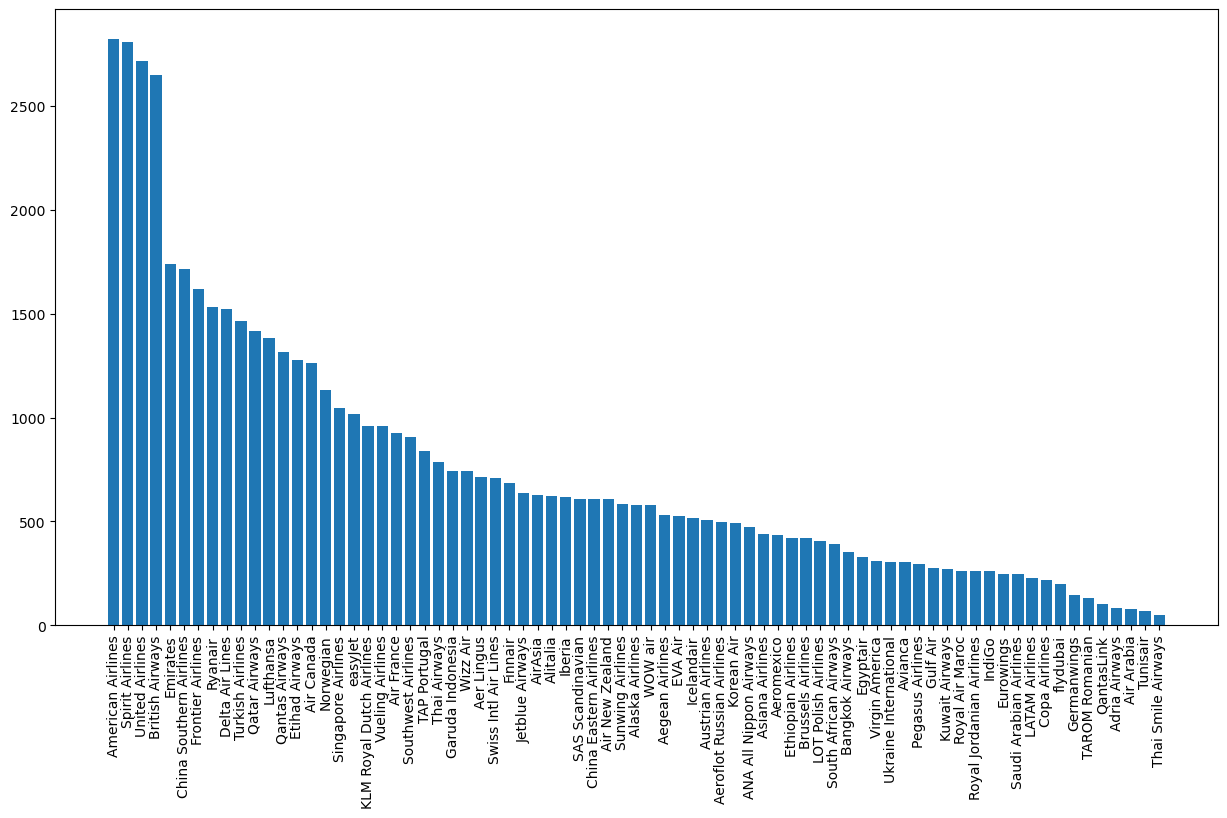

In [231]:
# Chart - 1 visualization code
plt.figure(figsize=(15,8))
plt.bar(x = df.airline.value_counts().index,height=df.airline.value_counts().values)  
plt.xticks(rotation = 90)

plt.show()

##### 1. Why did you pick the specific chart?

Bar Chart will help us to get the insights better if it is a categoryical one side and numerical(especially count) on other side. So I chose this chart.

##### 2. What is/are the insight(s) found from the chart?

We can able to see that most reviewed passengers are travelled in American Airlines,Spirit Airlines and United Airlines which is collectively more than 7800 reviews. And there are totally 75 unique airlines in our dataset. The lowest reviewed airlines "Thai Smile Airways".


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Some airlines reviews is most so may be those airlines are very popular among travellers and also may be the number of passengers using that airlines is high.

#### Chart - 2

In [232]:
# Chart - 2 visualization code

plt.figure(figsize=(15,8))
plt.bar(x = df.author.value_counts().index,height=df.author.value_counts().values)  
plt.xticks(rotation = 90)

plt.show()

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000025DF3BBEE50> (for post_execute):


KeyboardInterrupt: 

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***